## Week 3 - More on Pandas

In [75]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
#Dataset imports
pkmn = pd.read_csv("pokemon_long.csv")
pkmn.index = pkmn.name
pkmn.head()

abilities  against_bug  against_dark  \
name                                                                 
Bulbasaur   ['Overgrow', 'Chlorophyll']          1.0           1.0   
Ivysaur     ['Overgrow', 'Chlorophyll']          1.0           1.0   
Venusaur    ['Overgrow', 'Chlorophyll']          1.0           1.0   
Charmander     ['Blaze', 'Solar Power']          0.5           1.0   
Charmeleon     ['Blaze', 'Solar Power']          0.5           1.0   

            against_dragon  against_electric  against_fairy  against_fight  \
name                                                                         
Bulbasaur              1.0               0.5            0.5            0.5   
Ivysaur                1.0               0.5            0.5            0.5   
Venusaur               1.0               0.5            0.5            0.5   
Charmander             1.0               1.0            0.5            1.0   
Charmeleon             1.0               1.0            0.5            1.0   

            against_fire  against_flying  against_ghost  ...  percentage_male  \
name                                                     ...                    
Bulbasaur            2.0             2.0            1.0  ...             88.1   
Ivysaur              2.0             2.0            1.0  ...             88.1   
Venusaur             2.0             2.0            1.0  ...             88.1   
Charmander           0.5             1.0            1.0  ...             88.1   
Charmeleon           0.5             1.0            1.0  ...             88.1   

            pokedex_number  sp_attack  sp_defense  speed  type1   type2  \
name                                                                      
Bulbasaur                1         65          65     45  grass  poison   
Ivysaur                  2         80          80     60  grass  poison   
Venusaur                 3        122         120     80  grass  poison   
Charmander               4         60          50     65   fire     NaN   
Charmeleon               5         80          65     80   fire     NaN   

            weight_kg  generation  is_legendary  
name                                             
Bulbasaur         6.9           1             0  
Ivysaur          13.0           1             0  
Venusaur        100.0           1             0  
Charmander        8.5           1             0  
Charmeleon       19.0           1             0  

[5 rows x 41 columns]

In [60]:
econ = sm.datasets.macrodata.load_pandas().data
econ.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

Text(0.5, 1.0, 'US Economic Data')

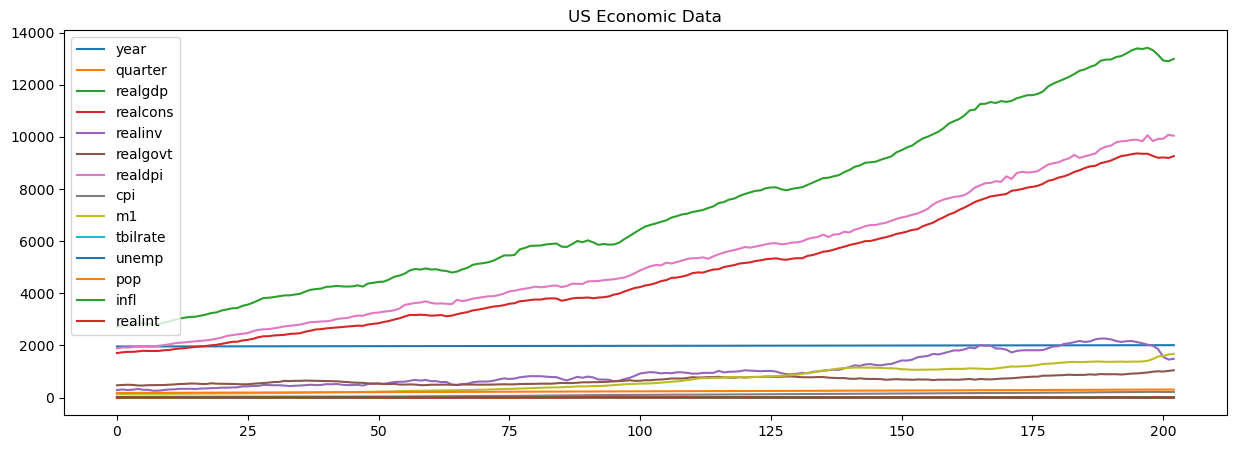

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
econ.plot(ax=ax)
plt.title("US Economic Data")


### Section 1: Advanced Methods & Operations

With DataFrames, there are some more advanced methods that you should be aware of:
<ol>
<li> .query()</li>
<li> .assign()</li>
<li> .any()</li>
<li> .all()</li>
<li> .apply()</li>



</ol>

In [70]:
#The .query method is like the boolean filtering we did last week.
# .query() is just sometimes shorter than writing a lot of boolean masks.

#Example
pkmn.query("name.str.startswith('M')")

#Example with economic data
econ.query("realint > 4")


year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
3    1959.0      4.0   2785.204    1753.7   299.356   484.052   1931.3   
31   1966.0      4.0   3884.520    2391.4   472.957   599.528   2688.2   
88   1981.0      1.0   6005.717    3822.8   795.091   567.618   4358.1   
89   1981.0      2.0   5957.795    3822.8   757.240   584.540   4358.6   
90   1981.0      3.0   6030.184    3838.3   804.242   583.890   4455.4   
91   1981.0      4.0   5955.062    3809.3   773.053   590.125   4464.4   
92   1982.0      1.0   5857.333    3833.9   692.514   591.043   4469.6   
94   1982.0      3.0   5866.370    3877.2   683.825   605.370   4520.6   
95   1982.0      4.0   5871.001    3947.9   622.930   623.307   4536.4   
96   1983.0      1.0   5944.020    3986.6   645.110   630.873   4572.2   
97   1983.0      2.0   6077.619    4065.7   707.372   644.322   4605.5   
98   1983.0      3.0   6197.468    4137.6   754.937   662.412   4674.7   
100  1984.0      1.0   6448.264    4239.2   921.763   644.635   4875.4   
101  1984.0      2.0   6559.594    4299.9   952.841   664.839   4959.4   
102  1984.0      3.0   6623.343    4333.0   974.989   662.294   5036.6   
103  1984.0      4.0   6677.264    4390.1   958.993   684.282   5084.5   
105  1985.0      2.0   6797.344    4505.2   943.383   708.524   5172.7   
106  1985.0      3.0   6903.523    4590.8   932.959   732.305   5140.7   
108  1986.0      1.0   7022.757    4639.3   967.442   728.125   5255.8   
122  1989.0      3.0   7927.393    5236.1  1021.604   791.819   5787.0   
128  1991.0      1.0   7950.164    5284.4   896.210   806.775   5896.3   
156  1998.0      1.0  10103.425    6707.2  1672.732   668.783   7406.2   
190  2006.0      3.0  12965.916    9090.7  2229.636   892.002   9662.5   
198  2008.0      3.0  13324.600    9267.7  1990.693   991.551   9838.3   
199  2008.0      4.0  13141.920    9195.3  1857.661  1007.273   9920.4   

         cpi      m1  tbilrate  unemp      pop   infl  realint  
3     29.370   140.0      4.33    5.6  179.386   0.27     4.06  
31    32.900   171.9      5.00    3.7  197.736   0.61     4.39  
88    89.100   427.4     13.95    7.4  229.403   8.62     5.32  
89    91.500   426.9     15.33    7.4  229.966  10.63     4.69  
90    93.400   428.4     14.58    7.4  230.641   8.22     6.36  
91    94.400   442.7     11.33    8.2  231.157   4.26     7.07  
92    95.000   447.1     12.95    8.8  231.645   2.53    10.42  
94    98.100   464.5      8.10    9.9  232.816   2.45     5.65  
95    97.900   477.2      7.96   10.7  233.322  -0.82     8.77  
96    98.800   493.2      8.22   10.4  233.781   3.66     4.56  
97    99.800   507.8      8.69   10.1  234.307   4.03     4.66  
98   100.800   517.2      8.99    9.4  234.907   3.99     5.01  
100  103.300   535.0      9.43    7.9  235.839   4.67     4.76  
101  104.100   540.9      9.94    7.5  236.348   3.09     6.85  
102  105.100   543.7     10.19    7.4  236.976   3.82     6.37  
103  105.700   557.0      8.14    7.3  237.468   2.28     5.87  
105  107.700   589.1      7.17    7.3  238.466   2.61     4.56  
106  108.500   607.8      7.13    7.2  239.113   2.96     4.17  
108  108.700   641.0      6.56    7.0  240.094  -4.39    10.95  
122  125.400   786.6      7.76    5.3  248.067   2.88     4.88  
128  135.100   843.2      5.83    6.6  252.643   1.19     4.65  
156  162.200  1076.1      5.02    4.6  275.304   0.49     4.53  
190  201.900  1369.4      4.90    4.7  299.593  -1.58     6.48  
198  216.889  1474.7      1.17    6.0  305.270  -3.16     4.33  
199  212.174  1576.5      0.12    6.9  305.952  -8.79     8.91

In [62]:
# The .assign method is used for creating new columns

#Example:
#Some Pokemon have two types.
#Imagine I wanted to make a boolean column signifying whether or not a pokemon has more than one type
#And another column on the average attack (pokemon have regular and special attack)

pkmn.assign(
    more_than_1_type = ~ pkmn.type2.isna(),
    avg_defense = (pkmn.defense + pkmn.sp_defense)/2
)


#Example with macroeconomic data
#Making a new column for increase in population per year
econ.assign(
    pop_change = econ['pop'].diff()
)


year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
0    1959.0      1.0   2710.349    1707.4   286.898   470.045   1886.9   
1    1959.0      2.0   2778.801    1733.7   310.859   481.301   1919.7   
2    1959.0      3.0   2775.488    1751.8   289.226   491.260   1916.4   
3    1959.0      4.0   2785.204    1753.7   299.356   484.052   1931.3   
4    1960.0      1.0   2847.699    1770.5   331.722   462.199   1955.5   
..      ...      ...        ...       ...       ...       ...      ...   
198  2008.0      3.0  13324.600    9267.7  1990.693   991.551   9838.3   
199  2008.0      4.0  13141.920    9195.3  1857.661  1007.273   9920.4   
200  2009.0      1.0  12925.410    9209.2  1558.494   996.287   9926.4   
201  2009.0      2.0  12901.504    9189.0  1456.678  1023.528  10077.5   
202  2009.0      3.0  12990.341    9256.0  1486.398  1044.088  10040.6   

         cpi      m1  tbilrate  unemp      pop  infl  realint  pop_change  
0     28.980   139.7      2.82    5.8  177.146  0.00     0.00         NaN  
1     29.150   141.7      3.08    5.1  177.830  2.34     0.74       0.684  
2     29.350   140.5      3.82    5.3  178.657  2.74     1.09       0.827  
3     29.370   140.0      4.33    5.6  179.386  0.27     4.06       0.729  
4     29.540   139.6      3.50    5.2  180.007  2.31     1.19       0.621  
..       ...     ...       ...    ...      ...   ...      ...         ...  
198  216.889  1474.7      1.17    6.0  305.270 -3.16     4.33       0.787  
199  212.174  1576.5      0.12    6.9  305.952 -8.79     8.91       0.682  
200  212.671  1592.8      0.22    8.1  306.547  0.94    -0.71       0.595  
201  214.469  1653.6      0.18    9.2  307.226  3.37    -3.19       0.679  
202  216.385  1673.9      0.12    9.6  308.013  3.56    -3.44       0.787  

[203 rows x 15 columns]

In [16]:
# The .any() method useful for Truth values on columns


#Example on a series
#Suppose I wanted to check if there are any pokemon taller than 15 M
(pkmn.height_m > 20).any()


#Suppose I wanted to look at all attack types and see if there are any above a multiplier of 2

attack_eff_cols = [col_name for col_name in pkmn.columns if col_name.startswith("against")]
(pkmn[attack_eff_cols] > 2).any()

against_bug          True
against_dark         True
against_dragon      False
against_electric     True
against_fairy        True
against_fight        True
against_fire         True
against_flying       True
against_ghost        True
against_grass        True
against_ground       True
against_ice          True
against_normal      False
against_poison       True
against_psychic      True
against_rock         True
against_steel        True
against_water        True
dtype: bool

In [33]:
# The .all() method just checks wether all rows in a column evaluate to True when given a condition

#Example:
#Suppose I really quickly wanted to check whether all pokemon had attack power
(pkmn.attack > 0).all() #On a series

#On a dataframe
(pkmn[['attack', 'defense', 'speed']] > 0).all()

attack     True
defense    True
speed      True
dtype: bool

In [56]:
#The .apply() method is complicated. You can pass your own function to it.
#There are two main use cases for the apply method.

#1. Elementwise
#Imagine I wanted to make a new column that counts the number of abilities each pokemon has:
def count_abilities(x):
    #x is each element of the series
    abilities = eval(x)
    return len(abilities)
    
pkmn.abilities.apply(count_abilities) #On a Series

#Imagine for standardization, I wanted to uppercase all string columns
#We can manually select string columns using: string_cols = ['...']

pkmn.select_dtypes('object').apply(lambda x: x.str.upper()) #On a DataFrame



#2. Aggregating down columns or across rows
np.round(pkmn.select_dtypes(np.number).apply(np.mean, axis=0), 2) #axis=0 means down the column
np.round(pkmn.select_dtypes(np.number).apply(np.mean, axis=1), 2) #axis=1 means across the rows


0      31347.15
1      31352.48
2      31368.04
3      31346.71
4      31352.71
         ...   
796    38899.62
797    38869.17
798    38896.41
799    38878.19
800    38873.45
Length: 801, dtype: float64

### Section 2: Aggregating Data

"Aggregating data" just means we are summarizing it. We can aggregate data across either rows or columns.
<br><br>
For example, we can take the means of all columns. The mean is the summary statistic we are calculating.

The most important function we will be working with is:
<ol>
<li> .agg() </li>
</ol>

In [87]:
#A Simple way to do this without using agg
pkmn.select_dtypes(np.number).mean()
pkmn.select_dtypes(np.number).sum()
pkmn.select_dtypes(np.number).nunique()


against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
defense              109
experience_growth      6
height_m              51
hp                    99
percentage_male        7
pokedex_number       801
sp_attack            111
sp_defense            97
speed                113
weight_kg            421
generation             7
is_legendary           2
dtype: int64

But what if we wanted to use a function that Pandas doesn't have implemented as a method?

We can use the .agg() method.



In [96]:
#.agg() takes functions or strings as parameters

#Simple example:
#Calculating basic summary stats
econ.agg(np.std) #Simply question. What does this return?
econ.agg(np.mean) #Explain why we don't use np.mean() with parentheses




#If we don't have a pandas method for it...define your own function

def range(x):
    return x.max() - x.min()
econ.iloc[:, 2:].agg(range)


realgdp     10704.917
realcons     7656.200
realinv      2004.957
realgovt      583.688
realdpi      8190.600
cpi           189.630
m1           1534.300
tbilrate       15.210
unemp           7.300
pop           130.867
infl           23.410
realint        17.740
dtype: float64

In [99]:
#Calculating different aggregates for different columns

econ.agg({
    'year': ['min', 'max'],
    'realgdp' : [np.mean, range],
    'unemp' : 'mean',
    'pop' : ['min', 'max', 'mean']
})



year       realgdp     unemp         pop
min    1959.0           NaN       NaN  177.146000
max    2009.0           NaN       NaN  308.013000
mean      NaN   7221.171901  5.884729  239.724153
range     NaN  10704.917000       NaN         NaN

___

In [210]:
econ.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

### Section 3: GroupBy

Now it gets even better. We can do more complicated aggregates by grouping by columns.

In [100]:
pkmn.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [115]:
def find_mode(x):
    return x.value_counts().idxmax() #How do you think this code works?
    
    
pkmn.groupby('is_legendary').agg({
    'height_m' : np.mean,
    'attack' : np.mean,
    'speed' : np.mean,
    'defense' : np.mean,
    'generation' : find_mode
})

height_m      attack      speed    defense  generation
is_legendary                                                        
0             1.055618   74.841313  63.548564  70.481532           1
1             2.281159  109.357143  95.428571  99.400000           7

In [120]:
#Another example:
#Average interest rate by year
econ.groupby('year').agg({
    'realint':np.mean})


# fig, ax = plt.subplots(figsize=(10, 5))
# econ.groupby('year').agg({
#     'realint':np.mean}).plot(ax=ax)
# plt.title('Average Real Interest Rate per Year')


Text(0.5, 1.0, 'Average Real Interest Rate per Year')

(0.0, 1.5)

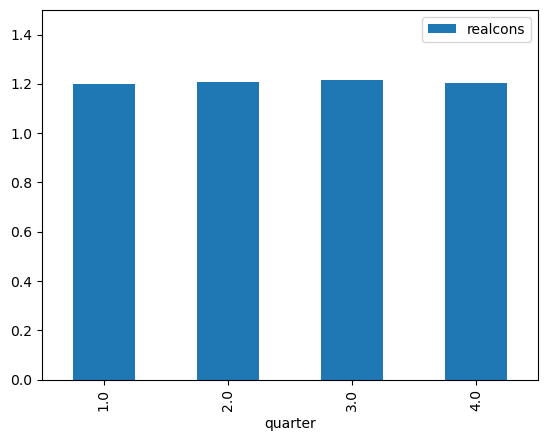

In [127]:
#Another example:
#By quarter average consumption spending

(econ.groupby('quarter').agg({'realcons': 'mean'}) / 4000).plot(kind='bar')
plt.ylim(0, 1.5)
plt.title('Average Real Consumption Per Quarter')

#### Rolling and Expanding Windows

In [162]:
#import the tsla dataset
btc = pd.read_csv('bitcoin.csv', parse_dates=True)
btc.head()

Date        Open        High         Low       Close   Adj Close  \
0  2020-10-01  100.000000  100.000000  100.000000  100.000000  100.000000   
1  2020-10-02  100.000000  100.000000  100.000000  100.000000  100.000000   
2  2020-10-05  100.029999  100.040001   99.995003   99.995003   99.995003   
3  2020-10-06  100.010002  100.029999  100.010002  100.029999  100.029999   
4  2020-10-07   99.949997   99.959999   99.919998   99.919998   99.919998   

   Volume  
0       0  
1       0  
2   10725  
3   10080  
4    6350

In [209]:
#Example:

#Investments
#Imagine I was investing in Bitcoin

#Rolling windows can be useful for calculating cumulative return
#Return over two periods is the cumulative product

btc['Gross Daily Return'] = btc.Close.pct_change() + 1
btc = btc.assign(
Gross_Daily_Return = btc.Close.pct_change() + 1,
Cumulative_Gross_Return = lambda x: x['Gross Daily Return'].cumprod()
)

#Then the amount I have at time step i, would be C_i*CGR_t
plt.plot(btc.Cumulative_Gross_Return * 100)

#The above .cumprod is just using the expanding window. It is equivalent to
btc.Gross_Daily_Return.expanding().apply(lambda s: s.cumprod().iat[-1])



#Another example: Expanding windows can be useful for calculating High watermark
#The high watermark is the highest investment value up to the time t

(btc.Cumulative_Gross_Return * 100).expanding().max()







0             NaN
1      100.000000
2      100.000000
3      100.029999
4      100.029999
          ...    
732    100.154999
733    100.154999
734    100.154999
735    100.154999
736    100.154999
Name: Cumulative_Gross_Return, Length: 737, dtype: float64

___

### Section 4: Time Series

Time is a complicated subject in computer science.
<br>
We won't worry about timezones.
<br> <br>
Python has a standard (built-in) module called datetime. See this doc page for comprehensive information: https://docs.python.org/3/library/datetime.html



In [ ]:
import datetime as dt

The most important classes for you to know in this module are:
<ol>
<li> datetime.date (year, month, day) </li>
<li> datetime.time (hour, minute, second, microsecond, tzinfo) </li>
<li> datetime.datetime : A combination of a date and a time </li>
<li> datetime.timedelta : A duration expressing the difference between two date, time or datetime instances to microsecond resolution</li>
</ol>

In [166]:
#Example: Our bitcoin dataset
btc.Date = pd.to_datetime(btc.Date)
#We can take a look at its elements
btc.Date.iat[0]
btc.Date.iat[0].date()


datetime.date(2020, 10, 1)

In [172]:
#Now you can groupby
quarterly_stds = btc.groupby(pd.Grouper(key='Date', freq='Q')).std() #The standard deviation per quarter
quarterly_stds

Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2020-12-31  0.112726  0.112392  0.112881  0.112214   0.112214  15800.466179
2021-03-31  0.554986  0.549480  0.553691  0.548705   0.548705   1274.127625
2021-06-30  0.283721  0.276405  0.165209  0.147611   0.147611   1560.301048
2021-09-30  0.253828  0.256272  0.250945  0.253535   0.253535  15979.250751
2021-12-31  0.212006  0.210650  0.214023  0.208471   0.208471  44558.359775
2022-03-31  1.031406  1.028500  1.024860  1.020329   1.020329  66005.551248
2022-06-30  0.699860  0.718829  0.709961  0.710866   0.710866   2916.474494
2022-09-30  1.191883  1.176126  1.222926  1.207322   1.207322   2946.670024
2022-12-31  0.916842  0.924495  0.909885  0.918562   0.918562   4313.384751
2023-03-31  0.759492  0.761253  0.757034  0.756769   0.756769   1985.453045
2023-06-30  0.531677  0.537372  0.523755  0.524885   0.524885  24341.378762
2023-09-30  0.389993  0.403039  0.385942  0.394102   0.394102  10586.913671

In [192]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 5))
quarterly_stds.Close.plot()
plt.title("Quarterly Standard Deviations of Bitcoin Price")


Text(0.5, 1.0, 'Quarterly Standard Deviations of Bitcoin Price')

### Joins: (If we have time)